In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [4]:
# Function to generate synthetic data with noise
# The function represents a nonlinear relationship between x and y
def generating_func(x, err=0.5):
    return np.random.normal(10 - 1. / (x + 0.1), err)

In [5]:
# Number of training samples
n_samples = 8

# Fixing the random seed for reproducibility
np.random.seed(0)

# Generating x values in a logarithmic scale
x = 10 ** np.linspace(-2, 0, n_samples)

# Generating corresponding y values using the function
y = generating_func(x)

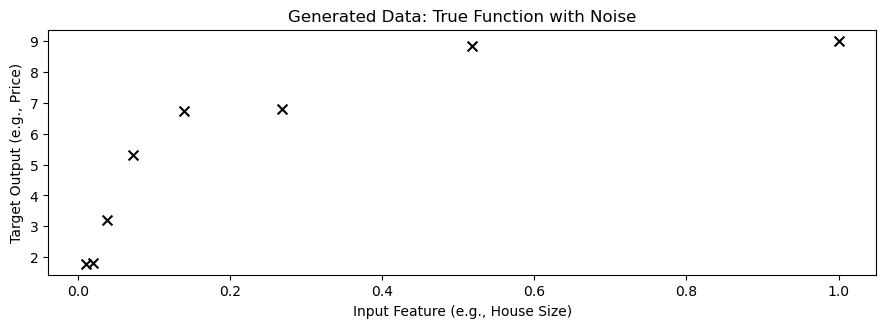

In [9]:
# Plot the generated data (scatter plot)
fig = plt.figure(figsize=(9, 3.5))
fig.subplots_adjust(left=0.06, right=0.98, bottom=0.15, top=0.85, wspace=0.05)
plt.scatter(x, y, marker='x', c='k', s=50)
plt.xlabel("Input Feature (e.g., House Size)")
plt.ylabel("Target Output (e.g., Price)")
plt.title("Generated Data: True Function with Noise")
plt.show()

In [11]:
# Creating test data for model predictions
x_test = np.linspace(-0.2, 1.2, 1000)

# Titles for different polynomial degrees
titles = ['d = 1 (under-fit; high bias)',
          'd = 2',
          'd = 3',
          'd = 4',
          'd = 5',
          'd = 6 (over-fit; high variance)']

# List of polynomial degrees to test
degrees = [1, 2, 3, 4, 5, 6]

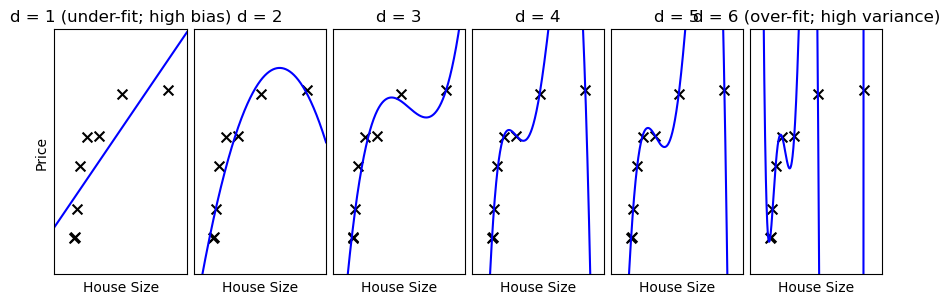

In [13]:
# Create a new figure for model comparisons
fig = plt.figure(figsize=(9, 3.5))
fig.subplots_adjust(left=0.06, right=0.98, bottom=0.15, top=0.85, wspace=0.05)

# Generate another set of data (used in the commented-out section)
np.random.seed(1)
x1 = 10 ** np.linspace(-2, 0, n_samples)
y1 = generating_func(x1)

# Loop through different polynomial degrees
for i, d in enumerate(degrees):
    # Create a subplot for each polynomial degree
    ax = fig.add_subplot(161 + i, xticks=[], yticks=[])
    
    # Scatter plot of training data
    ax.scatter(x, y, marker='x', c='k', s=50)

    # Fit a polynomial regression model of degree d
    model = make_pipeline(PolynomialFeatures(d), LinearRegression())
    model.fit(x[:, np.newaxis], y)

    # Plot the model's predictions on test data
    ax.plot(x_test, model.predict(x_test[:, np.newaxis]), '-b')

    # Set axes limits and labels
    ax.set_xlim(-0.2, 1.2)
    ax.set_ylim(0, 12)
    ax.set_xlabel('House Size')
    if i == 0:
        ax.set_ylabel('Price')

    # Assign title to show underfitting or overfitting behavior
    ax.set_title(titles[i])
   
# Display the final figure with different polynomial fits
plt.show()